Import modul yang diperlukan

In [ ]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind,levene,kruskal
from statsmodels.stats.proportion import proportions_ztest

Load data insurance

In [ ]:
insurance = pd.read_csv('insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
insurance.shape

(1338, 7)

Pada dataset insurance terdapat sebanyak 1338 baris dan 7 kolom

Data insurance berisi 7 kolom dimana =


*   age = Usia penerima manfaat utama
*   sex = gender (female/male)
*   bmi = body mass index, menyediakan informasi tentang tubuh, bobot yang relatif tinggi atau rendah relatif terhadap tinggi badan, indeks objektif bobot (kg/m2) menggubakan rasio dari tinggi badan ke bobot, idealnya antara 18.5 hingga 24.9
*   children = jumlah anak yang tercakup dalam insuransi kesehatan
*   smoker = informasi penerima manfaat merokok atau tidak
*   region = tempat tinggal penerima manfaat (US, northeast, southeast, southwest, northwest)
*   charges = biaya medis individu ditagih oleh asuransi kesehatan







Melihat Informasi Dataframe



In [ ]:
insurance.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
insurance.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,1338.0,NaN,NaN,NaN,39.207025,14.04996,18.0,27.0,39.0,51.0,64.0
sex,1338,2,male,676,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bmi,1338.0,NaN,NaN,NaN,30.663397,6.098187,15.96,26.29625,30.4,34.69375,53.13
children,1338.0,NaN,NaN,NaN,1.094918,1.205493,0.0,0.0,1.0,2.0,5.0
smoker,1338,2,no,1064,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,1338,4,southeast,364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
charges,1338.0,NaN,NaN,NaN,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


Dapat dilihat dari 1338 baris tidak terdapat baris yang memiliki missing value. Tipe data setiap kolom sudah tepat.

# Analisis Deskriptif Statistik

1.   Berapa rata-rata umur pengguna?
2.   Berapa rata-rata nilai BMI dari pengguna yang merokok?
3.   Apakah rata-rata umur perempuan dan laki-laki yang merokok sama?
4.   Mana yang lebih tinggi, rata-rata tagihan kesehatan perokok atau non perokok?
5.   BMI mana yang lebih tinggi, seorang perokok atau non perokok?

In [ ]:
# Berapa rata-rata umur pengguna?
age_avg = insurance['age'].mean()
print(f'Rata-rata umur pengguna adalah {age_avg:.2f}')

Rata-rata umur pengguna adalah 39.21


In [ ]:
# Berapa rata-rata nilai BMI dari pengguna yang merokok?
# tabel smoker
smoker = insurance[insurance['smoker'] == 'yes']
bmi_smoker_avg = smoker['bmi'].mean()
print(f'Rata-rata nilai bmi dari pengguna yang merokok {bmi_smoker_avg:.2f}')

Rata-rata nilai bmi dari pengguna yang merokok 30.71


In [ ]:
# Apakah rata-rata umur perempuan dan laki-laki yang merokok sama?
smoker[['sex', 'age']].groupby('sex').mean()

,age
sex,
female,38.608696
male,38.446541


Berdasarkan tabel di atas rata-rata umur perempuan dan laki-laki yang merokok tidak sama. Rata-rata umur perempuan perokok lebih besar sekitar 0.16 dibandingkan rata-rata umur laki-laki perokok.

In [ ]:
# Mana yang lebih tinggi, rata-rata tagihan kesehatan perokok atau non perokok?
insurance[['charges', 'smoker']].groupby('smoker').mean()


,charges
smoker,
no,8434.268298
yes,32050.231832


Berdasarkan tabel di atas rata-rata tagihan kesehatan perokok lebih besar 2361.96 daripada rata-rata tagihan non perokok

In [ ]:
# BMI mana yang lebih tinggi, seorang perokok atau non perokok?
insurance[['bmi','smoker']].groupby('smoker').mean()


,bmi
smoker,
no,30.651795
yes,30.708449


berdasarkan rata-ratanya BMI perokok lebih tinggi 0.05 saja

# Analisa Variabel Kategorik (PMF)
1. Gender mana yang memiliki tagihan paling tinggi?
2. Distribusi peluang tagihan di tiap-tiap region
3. Apakah setiap region memiliki proporsi data banyak orang yang sama?
4. Mana yang lebih tinggi proporsi perokok atau non perokok?
5. Berapa peluang seseorang tersebut adalah perempuan diketahui dia adalah perokok?
6. Berapa peluang seseorang tersebut adalah laki-laki diketahui dia adalah perokok?
7. Bagaimana bentuk distribusi peluang besar tagihan dari tiap-tiap region?

In [ ]:
# Gender mana yang memiliki tagihan paling tinggi?
insurance[['sex','charges']].groupby('sex').max()

,charges
sex,
female,63770.42801
male,62592.87309


Perempuan memiliki tagihan lebih tinggi daripada laki-laki

<ipython-input-19-2316b49dd638>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(southwest, bins = 20, hist = True, kde = True)
<ipython-input-19-2316b49dd638>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(southeast, bins = 20, hist = True, kde = True)
<ipython-input-19-2316b49dd638>:13: User

<function matplotlib.pyplot.show(close=None, block=None)>

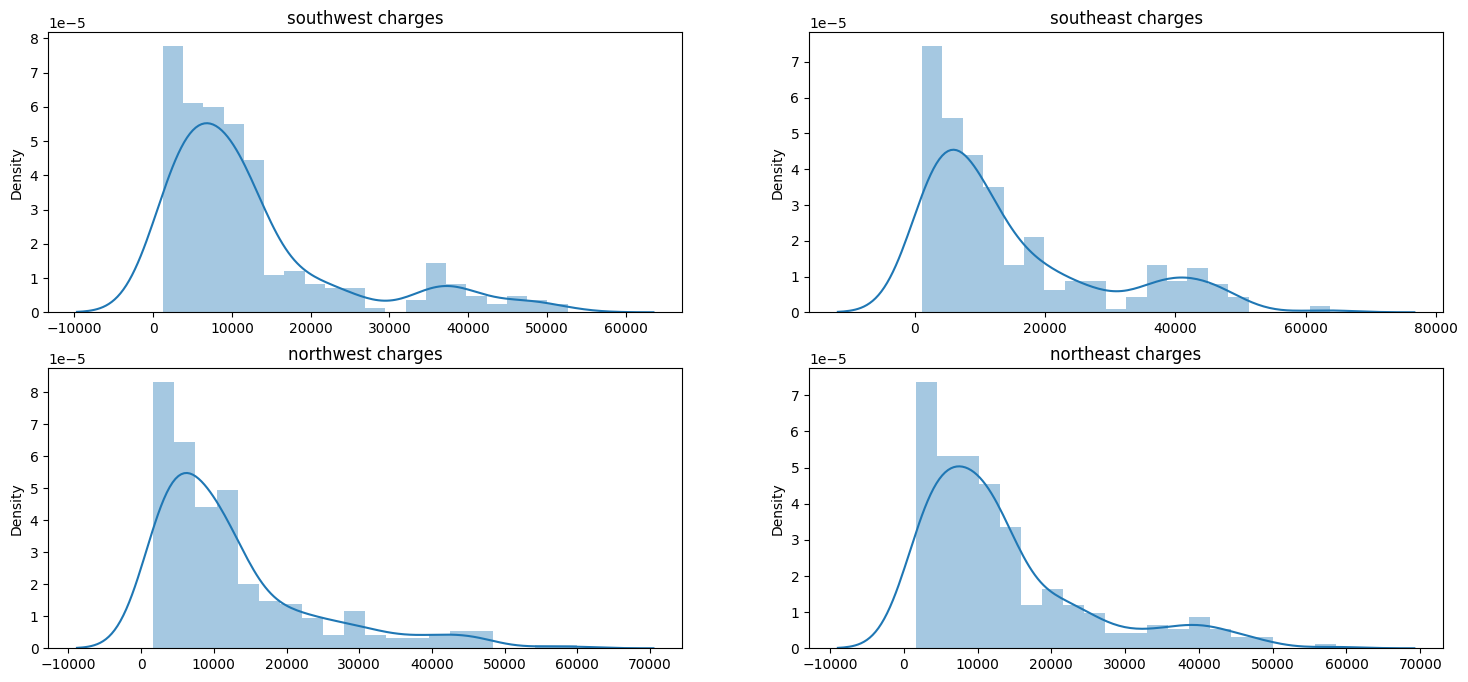

In [ ]:
# Distribusi peluang tagihan di tiap-tiap region
plt.figure(figsize=(18,8))
plt.subplot(2,2,1)
southwest = insurance[insurance["region"] == "southwest"][["charges"]]
sns.distplot(southwest, bins = 20, hist = True, kde = True)
plt.title("southwest charges")
plt.subplot(2,2,2)
southeast = insurance[insurance["region"] == "southeast"][["charges"]]
sns.distplot(southeast, bins = 20, hist = True, kde = True)
plt.title("southeast charges")
plt.subplot(2,2,3)
northwest = insurance[insurance["region"] == "northwest"][["charges"]]
sns.distplot(northwest, bins = 20, hist = True, kde = True)
plt.title("northwest charges")
plt.subplot(2,2,4)
northeast = insurance[insurance["region"] == "northeast"][["charges"]]
sns.distplot(northeast, bins = 20, hist = True, kde = True)
plt.title("northeast charges")

plt.show

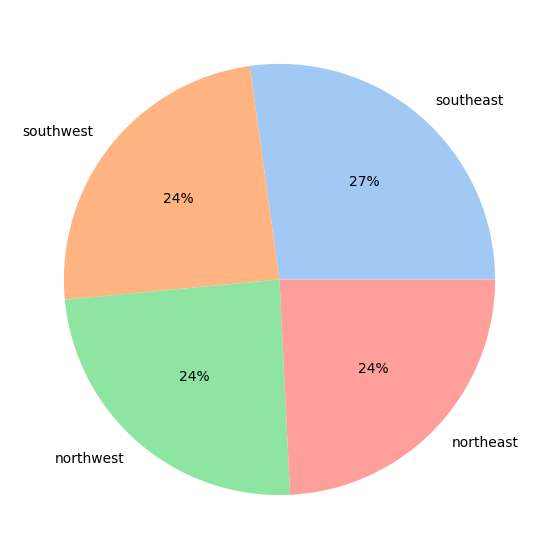

In [ ]:
# Proporsi data setiap region 
plt.figure(figsize=(10, 7))
data = insurance["region"].value_counts()
labels = ['southeast', 'southwest', 'northwest', 'northeast']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

southeast memiliki proporsi 3% lebih besar daripada ketiga region lainnya

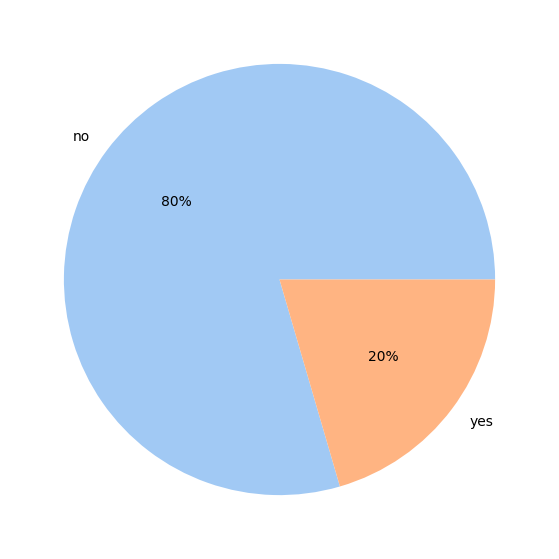

In [ ]:
# proposi perokok vs non perokok 
plt.figure(figsize=(10, 7))
data = insurance["smoker"].value_counts()
labels = ['no', 'yes']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

proporsi non perokok 60% lebih besar daripada proporsi perokok

In [ ]:
# tabel jumlah perokok dan non berdasarkan gender
survey_data = pd.crosstab(index=insurance['sex'], columns=insurance['smoker'], margins=True)
survey_data

smoker,no,yes,All
sex,,,
female,547,115,662
male,517,159,676
All,1064,274,1338


In [ ]:
# Berapa peluang seseorang tersebut adalah perempuan diketahui dia adalah perokok?
female_smoker = survey_data.iloc[0,1]/survey_data.iloc[2,1]
print(f'peluang seseorang tersebut adalah perempuan diketahui dia adalah perokok sebesar {female_smoker:.2f}')

peluang seseorang tersebut adalah perempuan diketahui dia adalah perokok sebesar 0.42


In [ ]:
# Berapa peluang seseorang tersebut adalah laki-laki diketahui dia adalah perokok?
male_smoker = survey_data.iloc[1,1]/survey_data.iloc[2,1]
print(f'peluang seseorang tersebut adalah laki-laki diketahui dia adalah perokok sebesar {male_smoker:.2f}')


peluang seseorang tersebut adalah laki-laki diketahui dia adalah perokok sebesar 0.58


**Bagaimana bentuk distribusi peluang besar tagihan dari tiap-tiap region**

Keempat region memiliki bentuk distribusi *right skewed*, nilai rata-rata tagihannya lebih besar daripada nilai median tagihannya. 

# Analisis Variabel Continue

**1. Mana yang lebih mungkin terjadi:**
* a. Seseorang dengan bmi diatas 25 mendapatkan tagihan kesehatan diatas 16.7k
* b. Seseorang dengan bmi dibawah 25 mendapatkan tagihan kesehatan diatas 16.7k

**2. Mana yang lebih mungkin terjadi:**
* a. Seseorang perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16,7k atau 
* b. Seseorang non perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16,7k

In [ ]:
# dataset charges dengan bmi > 25
bmi_more = insurance[insurance["bmi"] > 25][["charges"]]

# dataset charges lebih dari 16.7K di mana bmi > 25
bmi_more2 = bmi_more[bmi_more["charges"] > 16700]

# dataset charges dengan bmi < 25
bmi_less = insurance[insurance["bmi"] < 25][["charges"]]

# dataset charges lebih dari 16.7K di mana bmi < 25
bmi_less2 = bmi_less[bmi_less["charges"] > 16700]

# Mencari nilai proporsi masing-masing kategori 
proporsi_bmi_more = len(bmi_more2) / len(bmi_more)
print(f"proporsi data charges di atas 16.7k dengan bmi di atas 25 adalah {proporsi_bmi_more:.2f}")

proporsi_bmi_less = len(bmi_less2) / len(bmi_less)
print(f"proporsi data charges di atas 16.7k dengan bmi di bawah 25 adalah {proporsi_bmi_less:.2f}")

proporsi data charges di atas 16.7k dengan bmi di atas 25 adalah 0.26
proporsi data charges di atas 16.7k dengan bmi di bawah 25 adalah 0.21


yang lebih mungkin terjadi adalah opsi a, bmi di atas 25 mendapatkan tagihan di atas 16,7k

In [ ]:
# dataset charges dengan bmi > 25 dan seseorang adalah perokok
bmi_smoker = insurance[(insurance["bmi"] > 25) & (insurance["smoker"]=="yes")][["charges"]]

# dataset charges lebih dari 16.7K di mana bmi > 25 dan seseorang adalah perokok 
bmi_smoker2 = bmi_smoker[bmi_smoker["charges"] > 16700]

# dataset charges dengan bmi > 25 dan seseorang adalah non perokok
bmi_non_smoker = insurance[(insurance["bmi"] > 25) & (insurance["smoker"]=="no")][["charges"]]

# dataset charges lebih dari 16.7K di mana bmi > 25 dan seseorang adalah non perokok 
bmi_non_smoker2 = bmi_non_smoker[bmi_non_smoker["charges"] > 16700]

# Mencari nilai proporsi masing-masing kategori 
proporsi_bmi_smoker = len(bmi_smoker2) / len(bmi_smoker)
print(f"proporsi data charges di atas 16.7k dimana seseorang adalah perokok dan bmi di atas 25 adalah {proporsi_bmi_smoker:.2f}")

proporsi_bmi_non_smoker = len(bmi_non_smoker2) / len(bmi_non_smoker)
print(f"proporsi data charges di atas 16.7k dimana seseorang adalah non perokok dan bmi di atas 25 adalah {proporsi_bmi_non_smoker:.2f}")

proporsi data charges di atas 16.7k dimana seseorang adalah perokok dan bmi di atas 25 adalah 0.98
proporsi data charges di atas 16.7k dimana seseorang adalah non perokok dan bmi di atas 25 adalah 0.08


yang lebih mungkin terjadi adalah opsi a, seseorang perokok dengan bmi diatas 25 mendapatkan tagihan diatas 16,7k

# Analisa Korelasi Variabel

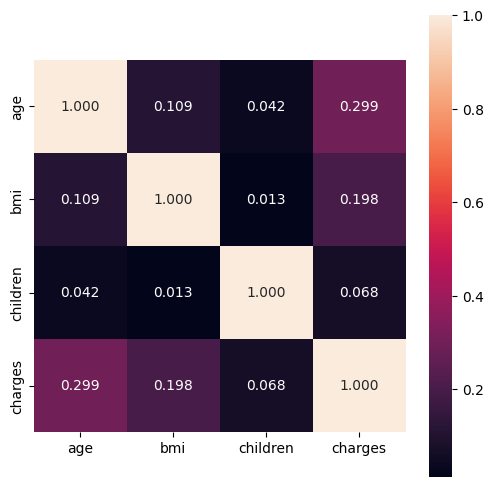

In [ ]:
columns_ = ["age","bmi","children","charges"]
corr_ = insurance[columns_].corr()
plt.figure(figsize = (6,6))
sns.heatmap(corr_, fmt= ".3f", annot= True,square= True)
plt.show()

charges dan age memiliki korelasi terkuat yaitu sebesar 0.3

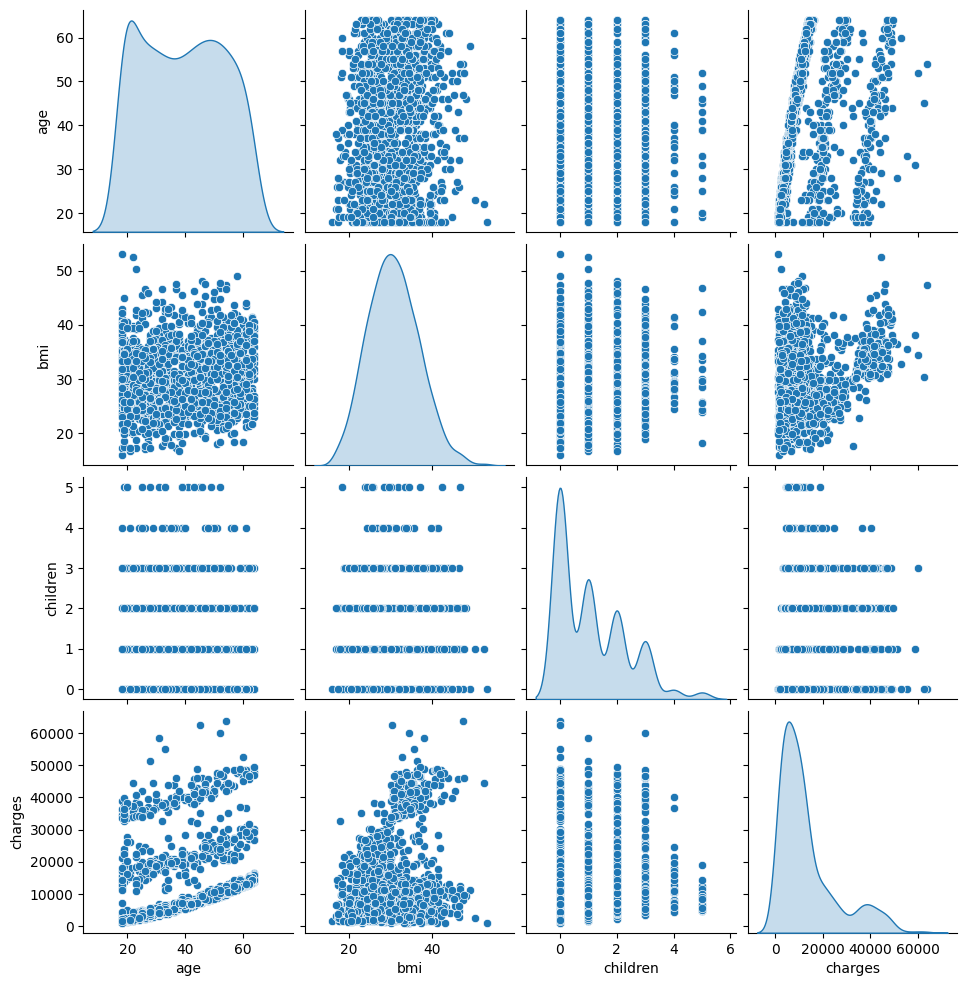

In [ ]:
# visualisasi hubungan antar variabel 
sns.pairplot(insurance[columns_], diag_kind = 'kde')
plt.show()

# Pengujian Hipotesis
1. Tagihan kesehatan perokok lebih tinggi daripada tagihan kesehatan non perokok 
2. Proporsi perokok laki-laki lebih besar dari perempuan
3. Tagihan kesehatan laki-laki lebih besar dari perempuan

In [ ]:
# Tagihan kesehatan perokok lebih tinggi daripada tagihan kesehatan non perokok 

smoker = insurance[insurance["smoker"] == "yes"]["charges"] 
non_smoker = insurance[insurance["smoker"] == "no"]["charges"] 

n_smoker = smoker.shape[0] 
n_non_smoker = non_smoker.shape[0] 
result = ttest_ind(smoker, non_smoker, equal_var= False, random_state= 42, alternative= 'greater') # Melakukan uji t

print(f'Banyak sampel untuk kategori smoker = {n_smoker}')
print(f'Banyak sampel untuk kategori non smoker = {n_non_smoker}')
print('='*50)

print('Pertama. menyatakan hipotesis dan taraf signifikansi:')
print('H0 : mu_smoker - mu_non_smoker <= 0')
print('H1 : mu_smoker - mu_non_smoker > 0')
print("alpha = 0.05")
print("="*50)

print(f"Statistik hitung = {result[0]}")
print(f"P Value = {result[1]}")
print("="*50)

if result[1] < 0.05:
  print("Hipotesis 0 ditolak")
else:
  print("Gagal menolak hipotesis 0")

Banyak sampel untuk kategori smoker = 274
Banyak sampel untuk kategori non smoker = 1064
Pertama. menyatakan hipotesis dan taraf signifikansi:
H0 : mu_smoker - mu_non_smoker <= 0
H1 : mu_smoker - mu_non_smoker > 0
alpha = 0.05
Statistik hitung = 32.751887766341824
P Value = 2.94473222335849e-103
Hipotesis 0 ditolak


In [ ]:
# Simpan jumlah perokok laki-laki dan perempuan
male_smoker = insurance[(insurance["smoker"] == "yes") & (insurance["sex"] == "male")]
female_smoker = insurance[(insurance["smoker"] == "yes") & (insurance["sex"] == "female")]

n_male_smoker = male_smoker.shape[0]
n_female_smoker = female_smoker.shape[0]

# Simpan jumlah total laki-laki dan perempuan dalam dataset
female = insurance[insurance["sex"] == "female"]
male = insurance[insurance["sex"] == "male"]

n_male = male.shape[0] 
n_female = female.shape[0] 

# Hitung proporsi perokok laki-laki dan perempuan
proportion_male = n_male_smoker / n_male
proportion_female = n_female_smoker / n_female

# Lakukan uji statistik menggunakan uji proporsi
proportion = np.array([n_male_smoker, n_female_smoker])
n = np.array([n_male, n_female])

statistic, p_value = proportions_ztest(proportion, n)

print('Proporsi perokok laki-laki:', proportion_male)
print('Proporsi perokok perempuan:', proportion_female)
print("="*50)

print('Pertama. menyatakan hipotesis dan taraf signifikansi:')
print('H0 : mu_proportion_male - mu_proportion_female <= 0')
print('H1 : mu_proportion_male - mu_proportion_female > 0')
print("alpha = 0.05")
print("="*50)

# Cetak hasil

print('Statistik Hitung:', statistic)
print('P-value:', p_value)

if statistic < 0.05:
  print("Hipotesis 0 ditolak")
else:
  print("Gagal menolak hipotesis 0")

Proporsi perokok laki-laki: 0.23520710059171598
Proporsi perokok perempuan: 0.17371601208459214
Pertama. menyatakan hipotesis dan taraf signifikansi:
H0 : mu_proportion_male - mu_proportion_female <= 0
H1 : mu_proportion_male - mu_proportion_female > 0
alpha = 0.05
Statistik Hitung: 2.7867402154855503
P-value: 0.005324114164320532
Gagal menolak hipotesis 0


In [ ]:
# Tagihan kesehatan laki-laki lebih besar dari perempuan
female = insurance[insurance["sex"] == "female"]["charges"] 
male = insurance[insurance["sex"] == "male"]["charges"] 

n_male = male.shape[0] 
n_female = female.shape[0] 
result = ttest_ind(male, female, equal_var = True, random_state = 42, alternative= 'greater') # melakukan Uji t.

print(f'Banyak sampel untuk laki-laki = {n_male}')
print(f'Banyak sampel untuk perempuan = {n_female}')
print('='*50)

print('Pertama, menyatakan hipotesis dan taraf signifikansi:')
print('H0 : mu_laki-laki - mu_perempuan <= 0')
print('H1 : mu_laki-laki - mu_perempuan > 0')
print("alpha = 0.05")
print("="*50)

print(f"Statistik Hitung = {result[0]}")
print(f"P Value = {result[1]}")
print("="*50)

if result[1] < 0.05:
  print("Hipotesis 0 ditolak")
else:
  print("Gagal menolak hipotesis 0")

Banyak sampel untuk laki-laki = 676
Banyak sampel untuk perempuan = 662
Pertama, menyatakan hipotesis dan taraf signifikansi:
H0 : mu_laki-laki - mu_perempuan <= 0
H1 : mu_laki-laki - mu_perempuan > 0
alpha = 0.05
Statistik Hitung = 2.097546590051688
P Value = 0.01806636050296488
Hipotesis 0 ditolak
